In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from libs.lib import get_file_dir,set_korean

sns.set_style('white')
set_korean()

In [3]:
# load data
df_do = pd.read_csv(get_file_dir('refined','인구수_시도별.csv'))
df_gu = pd.read_csv(get_file_dir('refined','인구수_군구별.csv'))

In [4]:
df_do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    2430 non-null   object
 1   연도      2430 non-null   object
 2   명       2430 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 57.1+ KB


In [5]:
df_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36180 entries, 0 to 36179
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    36180 non-null  object
 1   연도      36180 non-null  object
 2   명       36180 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 848.1+ KB


In [6]:
# 전처리
df_do.loc[:,'연도'] = pd.to_datetime(df_do['연도']).dt.year
df_gu.loc[:,'연도'] = pd.to_datetime(df_gu['연도']).dt.year

In [7]:
# 시도별 
groupped_by_year_do = df_do.groupby(['행정구역','연도']).sum().reset_index()
groupped_by_year_do.to_csv(get_file_dir('refined','인구수_시도별(연별).csv'))

groupped_by_year_do = groupped_by_year_do[groupped_by_year_do['연도'] != 2022]

# 군구별
groupped_by_year_gu = df_gu.groupby(['행정구역','연도']).sum().reset_index()
groupped_by_year_gu.to_csv(get_file_dir('refined','인구수_군구별(연별).csv'))

groupped_by_year_gu = groupped_by_year_gu[groupped_by_year_gu['연도'] != 2022]

In [8]:
groupped_by_year_do.head()

,행정구역,연도,명
0,강원도,2011,18388852
1,강원도,2012,18450572
2,강원도,2013,18477843
3,강원도,2014,18499036
4,강원도,2015,18557287


In [9]:
groupped_by_year_gu.head()

,행정구역,연도,명
0,가평군,2011,710678
1,가평군,2012,721442
2,가평군,2013,731791
3,가평군,2014,733741
4,가평군,2015,739598


In [10]:
# 시각화를 위한 데이터 준비
district_do = groupped_by_year_do[~groupped_by_year_do['행정구역'].str.startswith('전국')]['행정구역'].unique()
district_gu = groupped_by_year_gu['행정구역'].unique()

print(district_do)
print(district_do.shape)
print()
print(district_gu)
print(district_gu.shape)

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']
(17,)

['가평군' '강남구' '강동구' '강릉시' '강북구' '강서구' '강진군' '강화군' '거제시' '거창군' '경산시' '경주시'
 '계룡시' '계양구' '고령군' '고성군' '고양시' '고창군' '고흥군' '곡성군' '공주시' '과천시' '관악구' '광명시'
 '광산구' '광양시' '광주시' '광진구' '괴산군' '구례군' '구로구' '구리시' '구미시' '군산시' '군위군' '군포시'
 '권선구' '금산군' '금정구' '금천구' '기장군' '기흥구' '김제시' '김천시' '김포시' '김해시' '나주시' '남구'
 '남동구' '남양주시' '남원시' '남해군' '노원구' '논산시' '단양군' '단원구' '달서구' '달성군' '담양군' '당진군'
 '당진시' '대덕구' '덕양구' '덕진구' '도봉구' '동구' '동남구' '동대문구' '동두천시' '동래구' '동안구' '동작구'
 '동해시' '마산합포구' '마산회원구' '마포구' '만안구' '목포시' '무안군' '무주군' '문경시' '미추홀구' '밀양시'
 '보령시' '보성군' '보은군' '봉화군' '부산진구' '부안군' '부여군' '부천시' '부평구' '북구' '분당구' '사상구'
 '사천시' '사하구' '산청군' '삼척시' '상당구' '상록구' '상주시' '서구' '서귀포시' '서대문구' '서북구' '서산시'
 '서원구' '서천군' '서초구' '성남시' '성동구' '성북구' '성산구' '성주군' '소사구' '속초시' '송파구' '수성구'
 '수영구' '수원시' '수정구' '수지구' '순창군' '순천시' '시흥시' '신안군' '아산시' '안동시' '안산시' '안성시'
 '안양시' '양구군' '양산시' '양양군' '양주시' '양천구' '양평군' '여수시' '여주군' '

In [94]:
# 전국 제외 시도별 증감률

this_data = groupped_by_year_do[~groupped_by_year_do['행정구역'].str.startswith('전국')]
# this_data.apply(myf)
this_data = pd.concat([this_data,pd.Series([],name='증감')],axis=1)

inc = this_data.values
for i,d in enumerate(inc):
    if i == 0 or inc[i-1][0] != inc[i][0]:
        inc[i][3] = 0
    else:
        inc[i][3] = inc[i][2]-inc[i-1][2]
processed = pd.DataFrame(data=inc,columns=this_data.columns)
processed

C:\Users\kdh\AppData\Local\Temp\ipykernel_17968\3935694312.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  this_data = pd.concat([this_data,pd.Series([],name='증감')],axis=1)


,행정구역,연도,명,증감
0,강원도,2011,18388852,0
1,강원도,2012,18450572,61720
2,강원도,2013,18477843,27271
3,강원도,2014,18499036,21193
4,강원도,2015,18557287,58251
...,...,...,...,...
182,충청북도,2017,19114237,67938
183,충청북도,2018,19153799,39562
184,충청북도,2019,19193056,39257
185,충청북도,2020,19180798,-12258


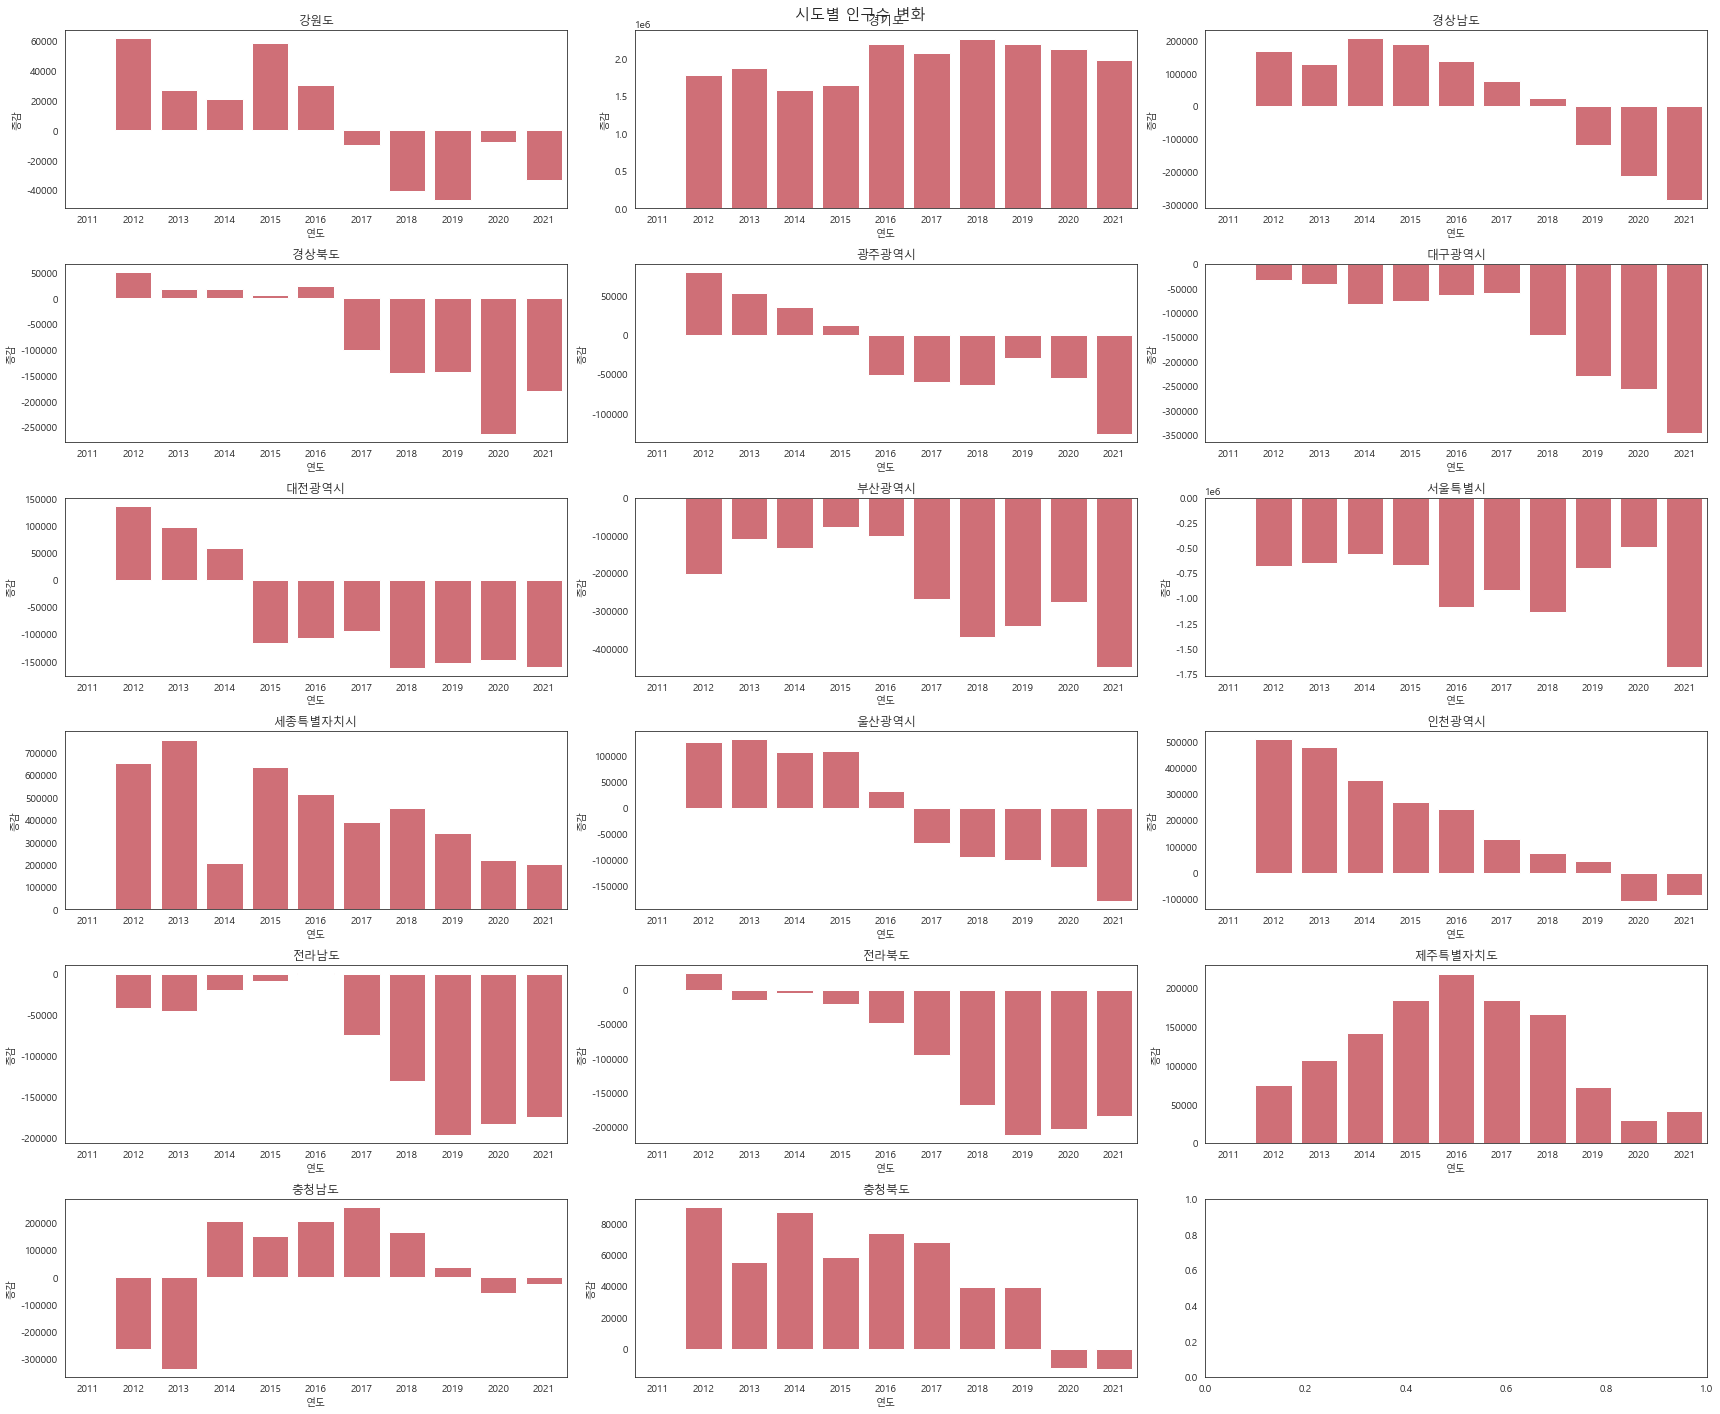

In [104]:
fig,axes = plt.subplots(nrows=6,ncols=3,figsize=(24,20))
axes_spread = [] 

for i in axes:
    axes_spread = [*axes_spread,*i]

for idx,i in enumerate(district_do):
    do = processed[processed['행정구역'] == i][['연도','증감']]
    
    options = {
        'data': do,
        'x':'연도',
        'y':'증감',
        'ax': axes_spread[idx],
        'color': '#df5f6a'
    }
    sns.barplot(**options)
    axes_spread[idx].set_title(i)
    
fig.suptitle('시도별 인구수 변화',fontsize=15)
# fig.subplots_adjust(top=5,hspace=3)
plt.tight_layout()     

,행정구역,연도,명
1672,여주군,2015,0
976,미추홀구,2015,0
977,미추홀구,2016,0
978,미추홀구,2017,0
2572,청원군,2015,0
...,...,...,...
1104,북구,2011,20011361
567,남구,2014,20145877
566,남구,2013,20254814
565,남구,2012,20331421
